#Importing libraries and read file

In [386]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplleaflet

In [387]:
#Reading file
df=pd.read_csv('temperature.csv')

#Calculation for finding temperature: -2014,2015

In [ ]:
#Seperating date to month and year
df['Year']=df['Date'].apply(lambda x:x[:4])
df['Dates']=df['Date'].apply(lambda x:x[5:])
df=df.rename(columns={'Dates':'Month_date'},inplace=False)
df.head()

In [389]:
#removing Leap year
df=df[df['Month_date']!='02-29']

In [390]:
#creating two dataframe for data to 2014 and 2015
df_not15=df[~(df['Year']=='2015')]
df_15=df[df['Year']=='2015']

In [391]:
#creating Dataframe for grouping Month_date and finding max and min temperature record 
max_aggr1=df_not15.groupby('Month_date').agg({'Data_Value':np.max})
min_aggr1=df_not15.groupby('Month_date').agg({'Data_Value':np.min})

max_aggr2=df_15.groupby('Month_date').agg({'Data_Value':np.max})
min_aggr2=df_15.groupby('Month_date').agg({'Data_Value':np.min})

all_max=pd.merge(max_aggr1.reset_index(),max_aggr2.reset_index(),left_index=True,on='Month_date')
all_min=pd.merge(min_aggr1.reset_index(),min_aggr2.reset_index(),left_index=True,on='Month_date')


In [392]:
break_max=all_max[all_max['Data_Value_y']>all_max['Data_Value_x']]
break_min=all_min[all_min['Data_Value_y']<all_min['Data_Value_x']]

In [393]:
max_aggr1.head(5)

,Data_Value
Month_date,
01-01,156
01-02,139
01-03,133
01-04,106
01-05,128


#Temperature graph plotting

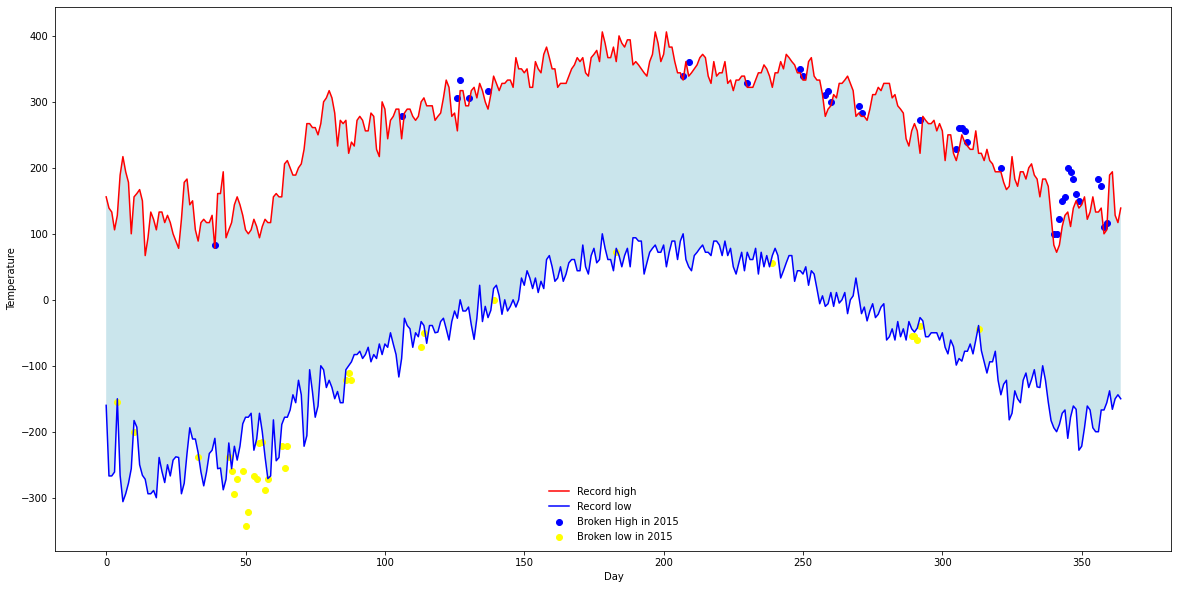

In [394]:
#Plotting the graph
plt.figure(figsize=(20,10))
plt.plot(max_aggr1.values,c='r',label="Record high")
plt.plot(min_aggr1.values,c='b',label="Record low")
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.fill_between(range(len(max_aggr1)),
                 np.array(max_aggr1.values.reshape(len(max_aggr1.values),)),
                 np.array(min_aggr1.values.reshape(len(min_aggr1.values),)),
                 facecolor='#2F99B4', 
                 alpha=0.25
                 )
plt.scatter(break_max.index.to_list(),break_max['Data_Value_y'].values,c='blue',label="Broken High in 2015")
plt.scatter(break_min.index.to_list(),break_min['Data_Value_y'].values,c="yellow",label="Broken low in 2015")
plt.legend(loc = 8, frameon = False)
plt.show()

#Calculation of finding temperature in near Ann Arbor, Michigan, United States

In [395]:

def leaflet_plot(hashid):  
  df2=pd.read_csv('BinSize.csv')
  location_by_hash = df2[df2['hash'] == hashid]
  lons=location_by_hash['LONGITUDE'].tolist()
  lats=location_by_hash['LATITUDE'].tolist()

  plt.figure(figsize=(5,8))
  plt.scatter(lons,lats,c='r',alpha=0.7,s=100)
  return mplleaflet.display()
leaflet_plot('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [396]:
df3bin=pd.read_csv('BinSize.csv')
hashkey='fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'
mask=(df3bin['hash']==hashkey)
df3bin=df3bin.loc[mask]


In [397]:
del df3bin['GSNFLAG'],df3bin['HCNFLAG'],df3bin['WMOID'],df3bin['hash'],df3bin['x'],df3bin['y'],df3bin['x_group'],df3bin['y_group'],df3bin['STATE'],df3bin['ELEVATION'],df3bin['xy_group']

In [398]:
mas=df_check.ID	.isin(df3bin.ID)
df_check=df_check[mas]

In [399]:
id_aggr_max=df_check.groupby('ID').agg({'Data_Value':np.max})
id_aggr_min=df_check.groupby('ID').agg({'Data_Value':np.min})

Graph of temperature at near Ann Arbor, Michigan, United States

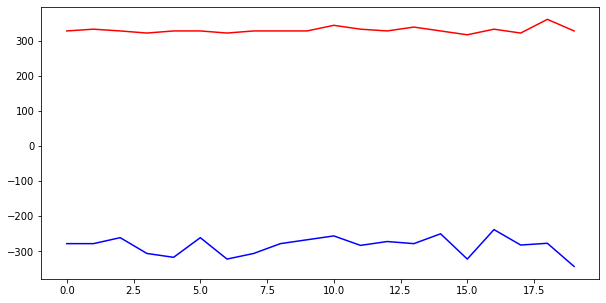

In [400]:
#Temperature in Ann Arbor, Michigan, United States
plt.figure(figsize=(10,5))
plt.plot(id_aggr_max.values,c='r',label="Record high")
plt.plot(id_aggr_min.values,c='b',label="Record low")